In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator.plot_resonator import amplitude
from kid_readout.analysis.timeseries import iqnoise

In [3]:
npd = npy.NumpyDirectory('/data/detectors/2016-10-27_223343_sweep_stream_simultaneous/')

In [4]:
npd.node_names()

['SweepStreamArray0',
 'ADCSnap1',
 'SweepStreamArray2',
 'ADCSnap3',
 'SweepStreamArray4',
 'ADCSnap5',
 'SweepStreamArray6',
 'ADCSnap7',
 'SweepStreamArray8',
 'ADCSnap9',
 'SweepStreamArray10',
 'ADCSnap11',
 'SweepStreamArray12',
 'ADCSnap13',
 'SweepStreamArray14',
 'ADCSnap15',
 'SweepStreamArray16',
 'ADCSnap17',
 'SweepStreamArray18',
 'ADCSnap19']

In [5]:
all_ssa = [npd.read(name) for name in npd.node_names() if name.startswith('SweepStreamArray')]

In [6]:
low_ssa = all_ssa[:5]
high_ssa = all_ssa[5:]

In [7]:
all_snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [8]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snaps]

[(452.0, 461.0),
 (267.0, 266.0),
 (156.0, 153.0),
 (83.0, 77.0),
 (53.0, 50.0),
 (189.0, 184.0),
 (108.0, 106.0),
 (64.0, 61.0),
 (36.0, 36.0),
 (24.0, 24.0)]

In [9]:
for ssa in all_ssa:
    temperature.add_temperature(ssa, cryostat='hpd')

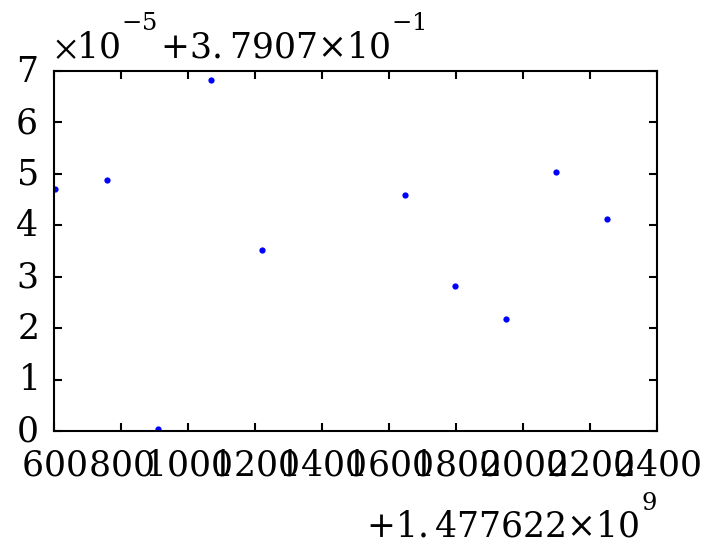

In [10]:
fig, ax = plt.subplots()
ax.plot([ssa.stream_array.epoch for ssa in all_ssa],
        [ssa.state.temperature.package for ssa in all_ssa],
        '.b')

df = pd.concat([sss.to_dataframe() for sss in all_sss])
np.save(npd.root_path.split('/')[-2] + '.npy', df.to_records())
df.shape

Qi: 10063; Qc: 20199
Qi: 9542; Qc: 20239
Qi: 9243; Qc: 20111
Qi: 9177; Qc: 20239
Qi: 9131; Qc: 20226


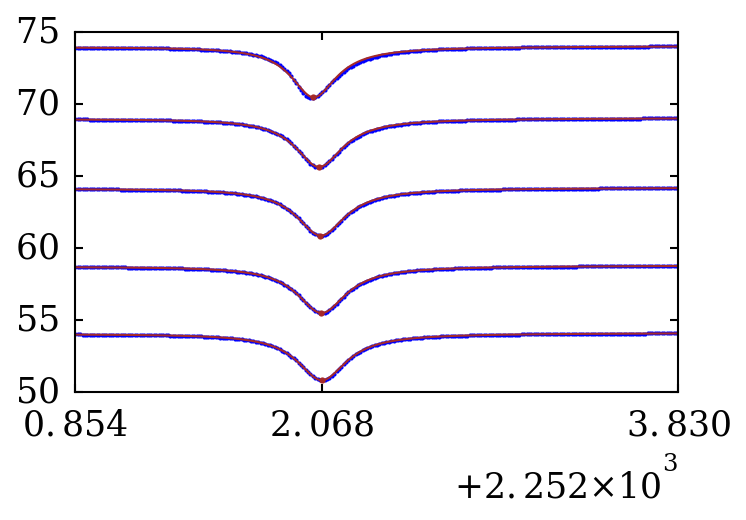

In [11]:
number = 0
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 7050; Qc: 37464
Qi: 8334; Qc: 49691
Qi: 6718; Qc: 37108
Qi: 6716; Qc: 37205
Qi: 6699; Qc: 37237


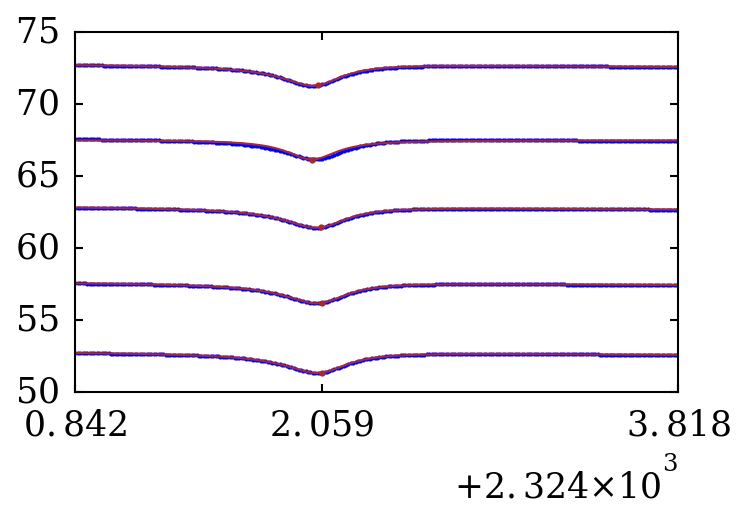

In [12]:
number = 1
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 10405; Qc: 4047
Qi: 10403; Qc: 4644
Qi: 10363; Qc: 4986
Qi: 5582; Qc: 2708
Qi: 8003; Qc: 1439


(40, 80)

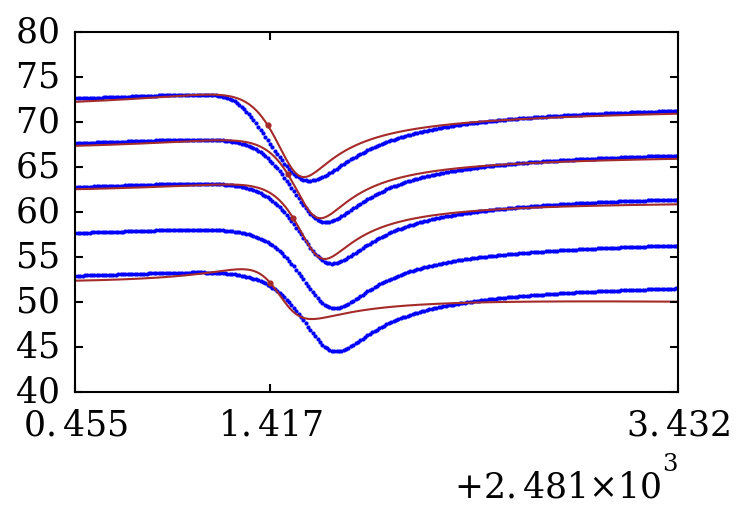

In [13]:
number = 2
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

ax.set_ylim(40, 80)

Qi: 425; Qc: 15407
Qi: 7637; Qc: 3140234
Qi: 100; Qc: 520
Qi: 702; Qc: 1
Qi: 734; Qc: 58831


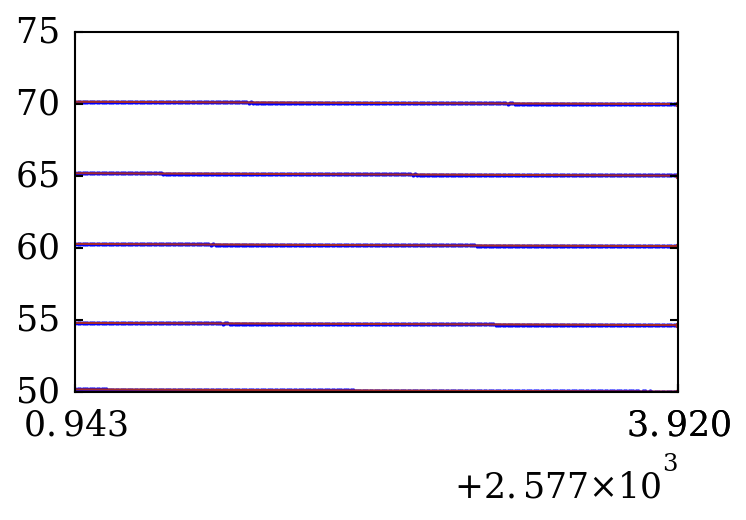

In [14]:
number = 3
fig, ax = plt.subplots()
for ssa in low_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 6833; Qc: 184262
Qi: 6893; Qc: 190456
Qi: 6887; Qc: 191296
Qi: 6922; Qc: 192636
Qi: 6897; Qc: 191395


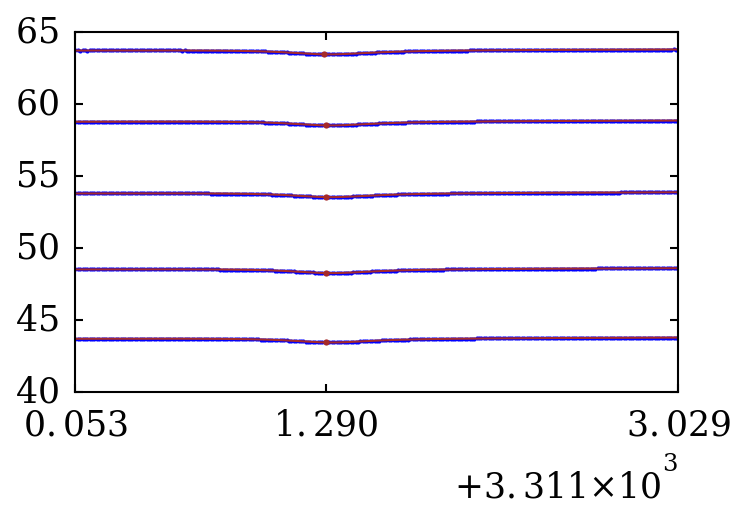

In [15]:
number = 0
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 7018; Qc: 50099
Qi: 6946; Qc: 50902
Qi: 6896; Qc: 51049
Qi: 6884; Qc: 51299
Qi: 6847; Qc: 51063


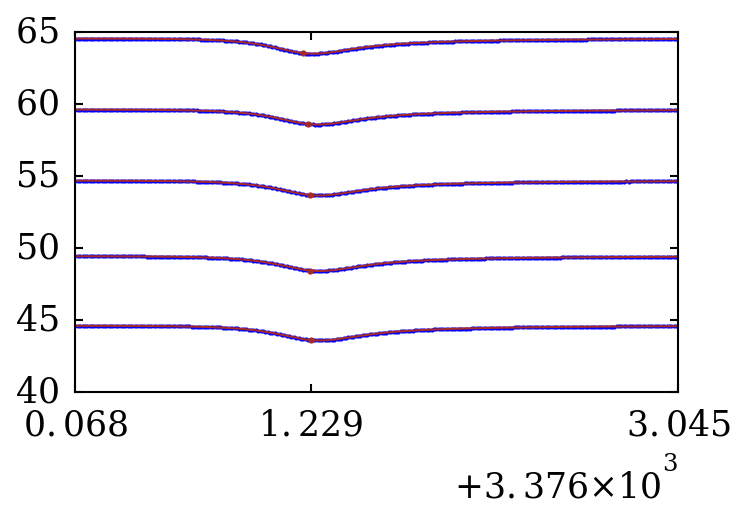

In [16]:
number = 1
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 6579; Qc: 27741
Qi: 6462; Qc: 28281
Qi: 6397; Qc: 28354
Qi: 6387; Qc: 28544
Qi: 6363; Qc: 28524


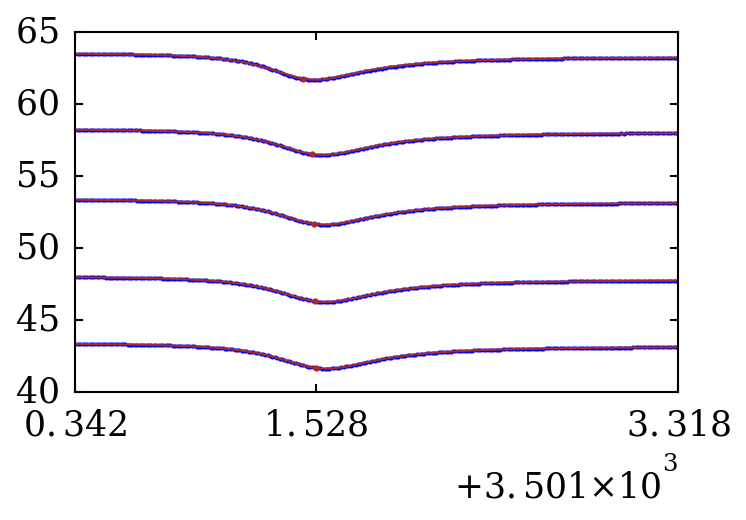

In [17]:
number = 2
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

Qi: 6526; Qc: 27752
Qi: 6416; Qc: 28201
Qi: 6383; Qc: 28392
Qi: 6346; Qc: 28423
Qi: 6325; Qc: 28404


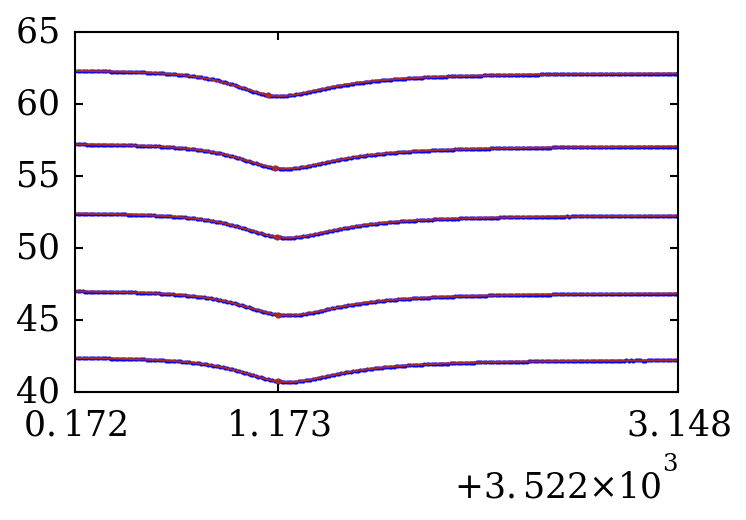

In [18]:
number = 3
fig, ax = plt.subplots()
for ssa in high_ssa:
    amplitude(ax, ssa[number].resonator)
    print("Qi: {:.0f}; Qc: {:.0f}".format(ssa[number].resonator.Q_i, ssa[number].resonator.Q_e_real))

In [34]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'
colors = ['blue', 'green', 'red', 'gray', 'cyan', 'magenta', 'yellow', 'black']
Sxx_linewidth = 0.5
Syy_linewidth = 0.3

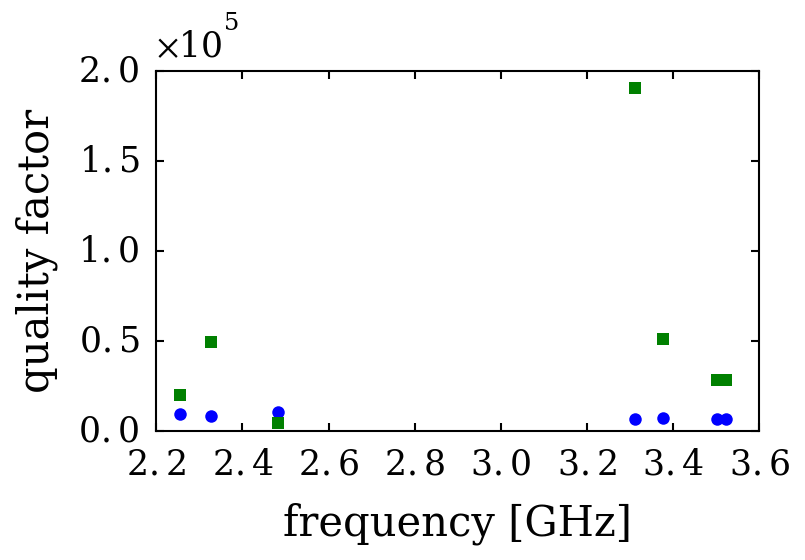

In [20]:
attenuation_index = 1
fig, ax = plt.subplots()
for lh_index, ssa in enumerate([low_ssa[attenuation_index], high_ssa[attenuation_index]]):
    for number in range(ssa.num_channels):
        if lh_index != 0 or number != 3:
            ax.plot(f_scale * ssa[number].resonator.f_0,
                    ssa[number].resonator.Q_i,
                    'o', color=Qi_color, label='$Q_i$')
            ax.plot(f_scale * ssa[number].resonator.f_0,
                    ssa[number].resonator.Q_e_real,
                    's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
#ax.legend(loc='upper center', numpoints=1)
#ax.set_xlim(1.9, 4.1)
#ax.set_ylim(0, 2e5)

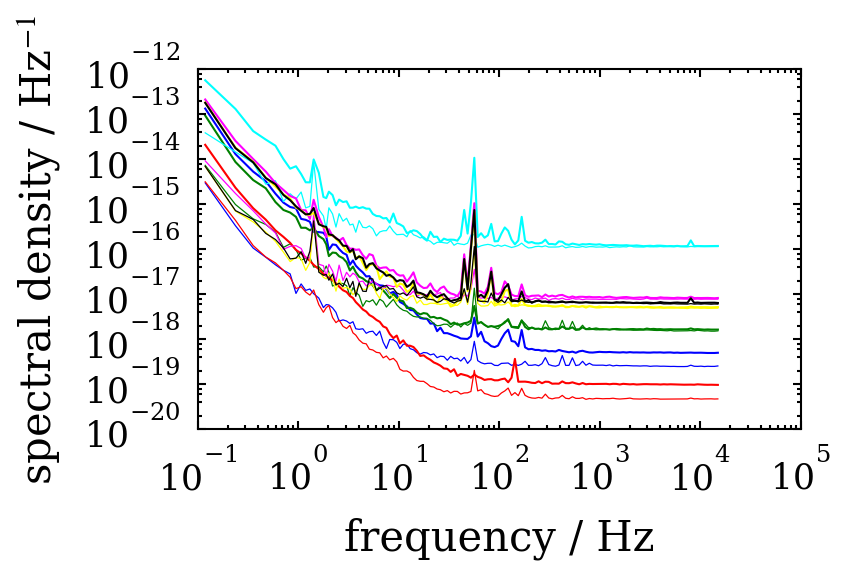

In [35]:
attenuation_index = 0

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')

for lh_index, ssa in enumerate([low_ssa[attenuation_index], high_ssa[attenuation_index]]):
    for number in range(ssa.num_channels):
        if lh_index != 0 or number != 3:
            ax.plot(ssa[number].S_frequency, ssa[number].S_xx,
                    color=colors[number + 4 * lh_index], linewidth=Sxx_linewidth)
            ax.plot(ssa[number].S_frequency, ssa[number].S_yy,
                    color=colors[number + 4 * lh_index], linewidth=Syy_linewidth)

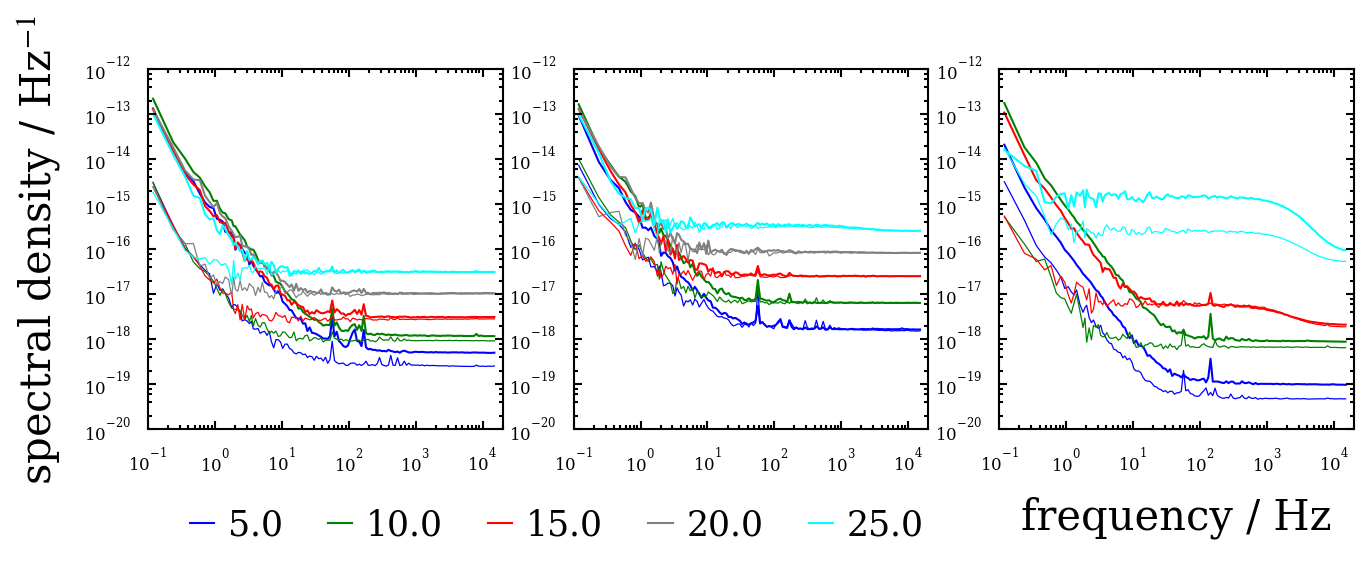

In [38]:
num_channels = 3
ssa_list = low_ssa
fig, axes = plt.subplots(1, num_channels, figsize=(2 * num_channels, 2))
for channel in range(num_channels):
    ax = axes[channel]
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(labelsize=4)
    ax.set_xlim(0.1, 2e4)
    ax.set_ylim(1e-20, 1e-12)
    for index, ssa in enumerate(ssa_list):
        sss = ssa[channel]
        ax.plot(sss.S_frequency, sss.S_xx, color=colors[index], linewidth=Sxx_linewidth,
                label='{:.1f}'.format(sss.stream.roach_state.dac_attenuation))
        ax.plot(sss.S_frequency, sss.S_yy, color=colors[index], linewidth=Syy_linewidth)
axes[0].legend(loc='lower left', bbox_to_anchor=(0, -0.4), ncol=len(ssa_list))
axes[-1].set_xlabel('frequency / Hz')
axes[0].set_ylabel('spectral density / Hz$^{-1}$')

fig.savefig('/home/flanigan/temp/simultaneous_350_mK_Sxx_and_Syy_low_band.pdf')

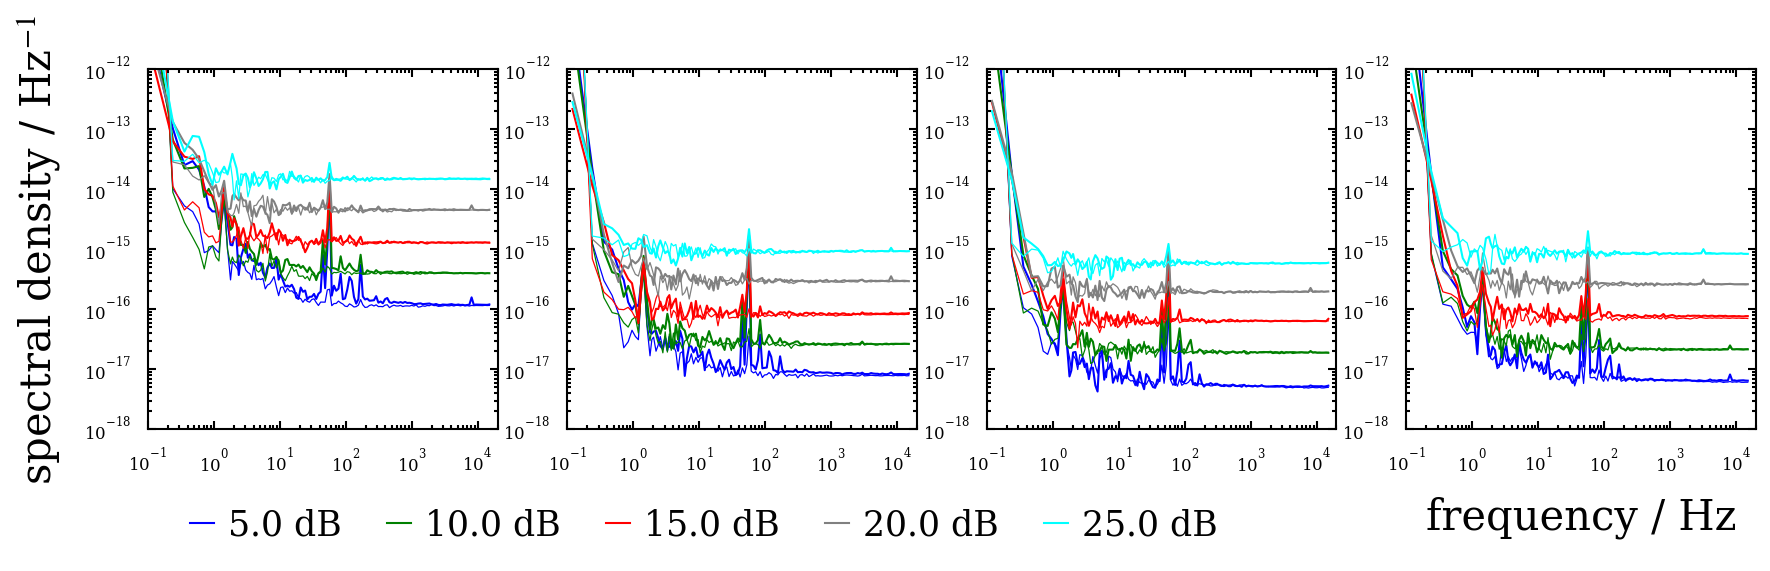

In [39]:
num_channels = 4
ssa_list = high_ssa
fig, axes = plt.subplots(1, num_channels, figsize=(2 * num_channels, 2))
for channel in range(num_channels):
    ax = axes[channel]
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(labelsize=4)
    ax.set_xlim(0.1, 2e4)
    ax.set_ylim(1e-18, 1e-12)
    for index, ssa in enumerate(ssa_list):
        sss = ssa[channel]
        sss.set_S(window=plt.mlab.window_hanning)
        ax.plot(sss.S_frequency, sss.S_xx, color=colors[index], linewidth=Sxx_linewidth,
                label='{:.1f} dB'.format(sss.stream.roach_state.dac_attenuation))
        ax.plot(sss.S_frequency, sss.S_yy, color=colors[index], linewidth=Syy_linewidth)
axes[0].legend(loc='lower left', bbox_to_anchor=(0, -0.4), ncol=len(ssa_list))
axes[-1].set_xlabel('frequency / Hz')
axes[0].set_ylabel('spectral density / Hz$^{-1}$')

fig.savefig('/home/flanigan/temp/simultaneous_350_mK_Sxx_and_Syy_high_band.pdf')